In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
all_data = pd.read_csv('all_in_one.csv')
all_data['일교차'] = all_data['최고 기온'] - all_data['최저 기온']
# all_data['인원수'] = all_data['인원수'].round(0)
all_data['평균 기온'] = all_data['평균 기온'].round(1)
all_data['일교차'] = all_data['일교차'].round(1)
all_data['강수량'] = all_data['강수량'].round(2)
all_data['풍속'] = all_data['풍속'].round(2)
all_data['습도'] = all_data['습도'].round(2)
all_data['date'] = pd.to_datetime(all_data['date'], format='%Y-%m-%d')
all_data['day name'] = all_data['date'].dt.day_name()
all_data['강수량'].fillna(-1, inplace =True)
all_data['강수량'] = all_data['강수량'] + 1
all_data.drop(['Unnamed: 0','최고 기온', '최저 기온'],axis = 1,inplace = True)

all_data.head(n=10)

,시도,인원수,date,년,월,일,SO2,O3,NO2,PM10,PM25,평균 기온,강수량,풍속,습도,일교차,day name
0,강원,3.0,2014-01-01,2014,1,1,0.009136,0.023676,0.014603,111.246212,NaN,6.2,1.00,4.35,31.95,5.4,Wednesday
1,강원,24.0,2014-01-02,2014,1,2,0.007581,0.018956,0.016050,50.683712,NaN,4.4,0.00,2.10,28.75,7.7,Thursday
2,강원,21.0,2014-01-03,2014,1,3,0.009411,0.015014,0.023754,62.465530,NaN,6.6,0.00,3.10,34.95,7.9,Friday
3,강원,14.0,2014-01-04,2014,1,4,0.006177,0.013977,0.019977,58.992424,NaN,1.1,9.20,1.55,86.40,3.2,Saturday
4,강원,4.0,2014-01-05,2014,1,5,0.006097,0.014955,0.018314,45.530303,NaN,0.7,1.05,1.50,87.75,5.4,Sunday
5,강원,18.0,2014-01-06,2014,1,6,0.008413,0.016176,0.020011,63.118939,NaN,0.6,0.00,1.80,59.90,9.3,Monday
6,강원,23.0,2014-01-07,2014,1,7,0.009857,0.015714,0.025610,79.139226,NaN,4.6,0.00,1.95,50.35,8.8,Tuesday
7,강원,15.0,2014-01-08,2014,1,8,0.008985,0.019766,0.022052,79.901136,NaN,4.4,0.00,2.65,55.95,6.9,Wednesday
8,강원,15.0,2014-01-09,2014,1,9,0.003860,0.028699,0.009425,27.633712,NaN,-3.2,0.00,2.90,25.25,7.2,Thursday
9,강원,10.0,2014-01-10,2014,1,10,0.006794,0.023129,0.016812,38.140909,NaN,-2.0,0.00,3.15,27.70,9.7,Friday


In [3]:
# 3일치 데이터 받기
all_data_group = all_data.groupby(['시도', '년', '월', '일'])

all_data_group.head()

,시도,인원수,date,년,월,일,SO2,O3,NO2,PM10,PM25,평균 기온,강수량,풍속,습도,일교차,day name
0,강원,3.000000,2014-01-01,2014,1,1,0.009136,0.023676,0.014603,111.246212,NaN,6.2,1.00,4.35,31.95,5.4,Wednesday
1,강원,24.000000,2014-01-02,2014,1,2,0.007581,0.018956,0.016050,50.683712,NaN,4.4,0.00,2.10,28.75,7.7,Thursday
2,강원,21.000000,2014-01-03,2014,1,3,0.009411,0.015014,0.023754,62.465530,NaN,6.6,0.00,3.10,34.95,7.9,Friday
3,강원,14.000000,2014-01-04,2014,1,4,0.006177,0.013977,0.019977,58.992424,NaN,1.1,9.20,1.55,86.40,3.2,Saturday
4,강원,4.000000,2014-01-05,2014,1,5,0.006097,0.014955,0.018314,45.530303,NaN,0.7,1.05,1.50,87.75,5.4,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29107,충북,33.678571,2018-12-27,2018,12,27,0.003431,0.023319,0.015058,27.968105,10.374428,-7.7,0.00,3.50,32.57,7.2,Thursday
29108,충북,35.375000,2018-12-28,2018,12,28,0.003686,0.014551,0.021985,37.849082,17.719322,-10.5,0.00,2.13,50.20,8.7,Friday
29109,충북,31.821429,2018-12-29,2018,12,29,0.003993,0.017992,0.020585,44.966146,17.092262,-7.8,1.00,2.27,44.67,11.2,Saturday
29110,충북,6.500000,2018-12-30,2018,12,30,0.003990,0.016297,0.020787,35.450521,20.476190,-7.7,1.00,0.93,50.70,13.4,Sunday


In [4]:
def holi_filter(data, month, day):
    is_month = data['월'] != month
    is_day = data['일'] != day
    is_not_holi = data[is_day | is_month]
    
    return is_not_holi

In [5]:
def rescale_monday(df):
    if df['day name'] == 'Monday':
        return df['인원수'] * 0.74
    else:
        return df['인원수']

In [6]:
# 데이터 변환

# 극적인 인원수 변화를 잡아줌
# 앞뒤를 참고하여 평균 적용, 시도 구분 필요
# all_data['인원수'] = all_data['인원수'].rolling(7, min_periods=1, center = True).mean()

# 주말, 공휴일 제거
day_name_mask = (all_data['day name'] != 'Sunday')
all_data = all_data[day_name_mask]
holi_list = [[1,1],[1,2],[3,1],[3,2],[5,5],[5,6],[6,6],[6,7],[8,15],[8,16],[10,3],[10,4],[10,9],[10,10],[12,25],[12,26]]
for i in holi_list:
    all_data = holi_filter(all_data, i[0], i[1])

# 월요일 *0.74
all_data['인원수'] = all_data.apply(rescale_monday, axis = 1)

#테스트용 col
# all_data['poe plus'] = all_data['인원수'] * 2

all_data.head(n=10)

,시도,인원수,date,년,월,일,SO2,O3,NO2,PM10,PM25,평균 기온,강수량,풍속,습도,일교차,day name
2,강원,21.00,2014-01-03,2014,1,3,0.009411,0.015014,0.023754,62.465530,NaN,6.6,0.0,3.10,34.95,7.9,Friday
3,강원,14.00,2014-01-04,2014,1,4,0.006177,0.013977,0.019977,58.992424,NaN,1.1,9.2,1.55,86.40,3.2,Saturday
5,강원,13.32,2014-01-06,2014,1,6,0.008413,0.016176,0.020011,63.118939,NaN,0.6,0.0,1.80,59.90,9.3,Monday
6,강원,23.00,2014-01-07,2014,1,7,0.009857,0.015714,0.025610,79.139226,NaN,4.6,0.0,1.95,50.35,8.8,Tuesday
7,강원,15.00,2014-01-08,2014,1,8,0.008985,0.019766,0.022052,79.901136,NaN,4.4,0.0,2.65,55.95,6.9,Wednesday
8,강원,15.00,2014-01-09,2014,1,9,0.003860,0.028699,0.009425,27.633712,NaN,-3.2,0.0,2.90,25.25,7.2,Thursday
9,강원,10.00,2014-01-10,2014,1,10,0.006794,0.023129,0.016812,38.140909,NaN,-2.0,0.0,3.15,27.70,9.7,Friday
10,강원,15.00,2014-01-11,2014,1,11,0.008600,0.020258,0.022607,53.852273,NaN,1.2,0.0,3.30,30.75,8.4,Saturday
12,강원,14.80,2014-01-13,2014,1,13,0.005893,0.023857,0.015618,41.474916,NaN,-2.6,0.0,1.95,28.90,8.2,Monday
13,강원,17.00,2014-01-14,2014,1,14,0.006646,0.021443,0.017808,37.413258,NaN,-2.6,0.0,1.90,38.80,8.1,Tuesday


상관관계

In [7]:
all_data.corrwith(all_data['인원수'])

인원수      1.000000
년        0.042862
월        0.045672
일        0.010611
SO2      0.165730
O3      -0.226795
NO2      0.488766
PM10     0.117312
PM25     0.058466
평균 기온   -0.165978
강수량     -0.060240
풍속      -0.018463
습도      -0.167920
일교차      0.162204
dtype: float64

In [8]:
corr_with_per = lambda x: x.corrwith(x['인원수'])
all_data_group = all_data.groupby('시도')
all_data_group.apply(corr_with_per)

,인원수,년,월,일,SO2,O3,NO2,PM10,PM25,평균 기온,강수량,풍속,습도,일교차
시도,,,,,,,,,,,,,,
강원,1.0,0.243248,0.145513,0.033480,0.113054,-0.173270,0.261048,0.074520,0.163742,-0.353586,-0.120534,0.068533,-0.225250,0.218825
경기,1.0,0.207228,0.241030,0.029450,-0.011971,-0.299013,0.262785,0.085301,0.128184,-0.339605,-0.153598,-0.064515,-0.227991,0.240715
경남,1.0,0.075813,0.077823,0.042770,-0.071888,-0.173111,0.278867,0.102658,0.035726,-0.472543,-0.140178,-0.009572,-0.234482,0.253977
경북,1.0,0.172979,0.050336,0.062952,-0.003981,-0.128158,0.338263,0.166746,0.167165,-0.488311,-0.152240,0.162869,-0.243985,0.142906
광주,1.0,0.094494,0.128932,0.041785,0.095574,-0.155409,0.315574,0.107563,0.106188,-0.318974,-0.099859,-0.094394,-0.234575,0.184627
대구,1.0,0.059199,0.062082,0.023364,0.181591,-0.235022,0.324944,0.177157,0.138255,-0.434615,-0.145541,-0.020177,-0.224560,0.140878
대전,1.0,0.076176,0.164828,0.015432,0.132951,-0.245156,0.345766,0.132201,0.096301,-0.364131,-0.133864,-0.089058,-0.199787,0.201710
부산,1.0,0.125360,0.019593,0.057136,-0.150015,-0.100649,0.291889,0.113055,0.121868,-0.517934,-0.112350,-0.017735,-0.449433,0.330041
서울,1.0,0.030938,0.132252,0.027356,0.131077,-0.258703,0.258911,0.136265,0.099015,-0.387346,-0.157216,-0.028893,-0.309063,0.231972


시각적 분석

In [9]:
all_data['day name'] = all_data['date'].dt.day_name()
all_data.head()

,시도,인원수,date,년,월,일,SO2,O3,NO2,PM10,PM25,평균 기온,강수량,풍속,습도,일교차,day name
2,강원,21.00,2014-01-03,2014,1,3,0.009411,0.015014,0.023754,62.465530,NaN,6.6,0.0,3.10,34.95,7.9,Friday
3,강원,14.00,2014-01-04,2014,1,4,0.006177,0.013977,0.019977,58.992424,NaN,1.1,9.2,1.55,86.40,3.2,Saturday
5,강원,13.32,2014-01-06,2014,1,6,0.008413,0.016176,0.020011,63.118939,NaN,0.6,0.0,1.80,59.90,9.3,Monday
6,강원,23.00,2014-01-07,2014,1,7,0.009857,0.015714,0.025610,79.139226,NaN,4.6,0.0,1.95,50.35,8.8,Tuesday
7,강원,15.00,2014-01-08,2014,1,8,0.008985,0.019766,0.022052,79.901136,NaN,4.4,0.0,2.65,55.95,6.9,Wednesday


In [10]:
temp_day_name = all_data.groupby('day name').mean()
temp_day_name.head(n=7)

,인원수,년,월,일,SO2,O3,NO2,PM10,PM25,평균 기온,강수량,풍속,습도,일교차
day name,,,,,,,,,,,,,,
Friday,58.446406,2016.042211,6.491457,16.069347,0.004198,0.029268,0.020619,43.993580,24.692941,13.774698,3.432915,2.046365,66.958324,9.685377
Monday,55.599732,2016.000501,6.490741,16.020020,0.004218,0.028688,0.019760,45.437848,24.977598,13.932407,4.839510,2.057219,68.504672,9.487037
Saturday,54.185755,2016.039950,6.523367,16.067085,0.004246,0.029069,0.019821,44.783686,25.504306,13.779241,3.397992,1.973526,67.435685,9.778693
Thursday,54.600274,2015.988775,6.546770,16.042654,0.004160,0.028606,0.020330,42.952983,24.342472,13.747044,3.507910,2.076604,67.626099,9.583109
Tuesday,55.799691,2015.967471,6.464549,16.091233,0.004274,0.028341,0.020396,45.693914,25.397893,13.668310,3.540198,2.076973,67.895832,9.616010
Wednesday,52.939100,2015.947791,6.518072,16.120482,0.004249,0.027824,0.020544,44.588788,24.455327,13.617671,4.160459,2.052199,68.162274,9.253087


In [11]:
temp_all = all_data[['월','일','인원수']]
temp_all['월일'] = temp_all['월'] * 100 + temp_all['일']
temp_all['인원수'] = temp_all['인원수'].round(0)
temp_all.head()

D:\anaconda3\envs\data\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,월,일,인원수,월일
2,1,3,21.0,103
3,1,4,14.0,104
5,1,6,13.0,106
6,1,7,23.0,107
7,1,8,15.0,108


<AxesSubplot:xlabel='월일', ylabel='인원수'>

D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50900 missing from current font.

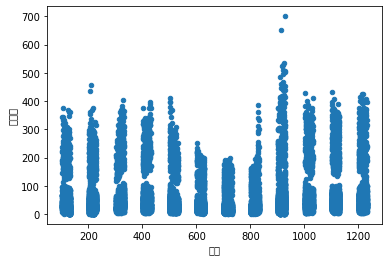

In [12]:
temp_all.plot.scatter(x='월일', y='인원수')
# 모든 자료의 분포

In [13]:
# temp_count = temp_all.groupby('인원수').count()
# temp_count = temp_count[['월']]
# temp_count.head()

In [14]:
# temp_count.plot.bar()
# 환자수 별 분포

In [15]:
temp_all = temp_all.groupby('월일').mean().reset_index()

In [16]:
temp_little = temp_all['인원수'] < 20
temp_little_df = temp_all[temp_little]
temp_little_df.head(n=20)
# 공휴일에 환자수가 적은것을 확인 가능

,월일,월,일,인원수


In [17]:
temp_little = temp_all['인원수'] > 80
temp_little_df = temp_all[temp_little]
temp_little_df.head(n=20)

,월일,월,일,인원수
243,910,9.0,10.0,80.093750
244,911,9.0,11.0,82.656250
246,913,9.0,13.0,91.093750
251,918,9.0,18.0,82.734375
252,919,9.0,19.0,85.825000
253,920,9.0,20.0,87.171875
254,921,9.0,21.0,91.140625
255,922,9.0,22.0,85.987500
260,927,9.0,27.0,86.015625
263,930,9.0,30.0,82.625000


<AxesSubplot:xlabel='월일', ylabel='인원수'>

D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50900 missing from current font.

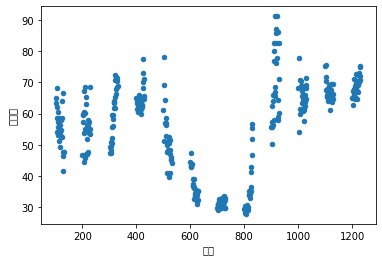

In [18]:
temp_all.plot.scatter(x='월일', y='인원수')
# 평균의 분포

<AxesSubplot:>

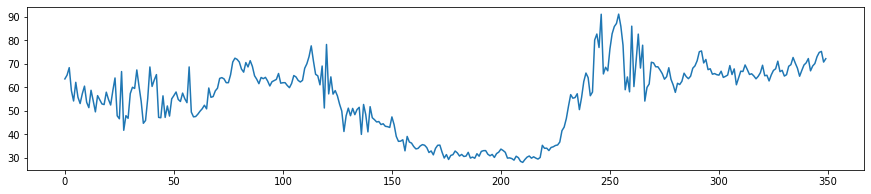

In [19]:
temp_all['인원수'].plot(figsize = (15,3))

<AxesSubplot:>

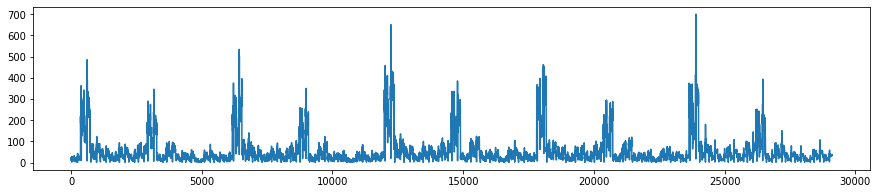

In [28]:
all_data['인원수'].plot(figsize=(15,3))

In [20]:
# grahp_temp = all_data.groupby(['년','월']).mean()
grahp_temp = all_data.groupby(['월','일']).mean()
grahp_temp.head()

인원수        년       SO2        O3       NO2       PM10       PM25  \
월 일                                                                           
1 3  63.527344  2016.00  0.005556  0.016924  0.027058  52.605136  31.576844   
  4  65.159565  2016.25  0.005456  0.018886  0.027022  62.135475  43.732320   
  5  68.327277  2016.50  0.005250  0.015537  0.028667  54.837702  34.237072   
  6  58.483268  2016.00  0.005233  0.019086  0.024326  44.586577  22.796924   
  7  54.109375  2015.50  0.005656  0.017013  0.025787  49.709330  23.173940   

        평균 기온       강수량        풍속         습도        일교차  
월 일                                                      
1 3  1.375000  0.000000  1.811406  55.020938  10.715625  
  4  2.762500  0.221094  1.801719  59.392031   9.120313  
  5  2.840625  2.159375  1.900469  61.032812   8.784375  
  6  2.182500  1.417000  2.220875  57.373000   9.911250  
  7  1.665625  0.455156  1.986563  56.939844   8.753125

<AxesSubplot:title={'center':'pm10'}, xlabel='월,일'>

D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)


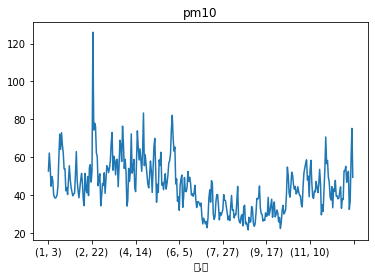

In [21]:
# grahp_temp['PM10'] = grahp_temp['PM10'].rolling(7, min_periods=1, center = True).mean()
grahp_temp['PM10'].plot(title = 'pm10')

<AxesSubplot:title={'center':'pm25'}, xlabel='월,일'>

D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)


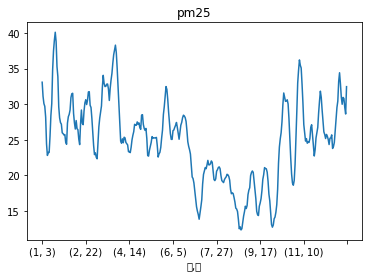

In [22]:
grahp_temp['PM25'] = grahp_temp['PM25'].rolling(7, min_periods=1, center = True).mean()
grahp_temp['PM25'].plot(title = 'pm25')

<AxesSubplot:title={'center':'no2'}, xlabel='월,일'>

D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)


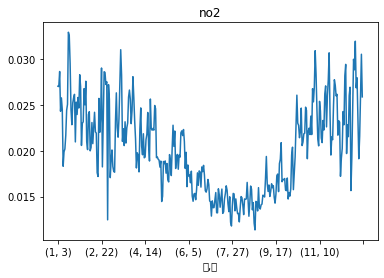

In [23]:
# grahp_temp['NO2'] = grahp_temp['NO2'].rolling(7, min_periods=1, center = True).mean()
grahp_temp['NO2'].plot(title = 'no2')

<AxesSubplot:title={'center':'wind'}, xlabel='월,일'>

D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)


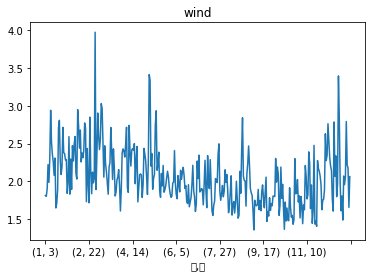

In [24]:
# grahp_temp['풍속'] = grahp_temp['풍속'].rolling(7, min_periods=1, center = True).mean()
grahp_temp['풍속'].plot(title = 'wind')

<AxesSubplot:title={'center':'temp'}, xlabel='월,일'>

D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)


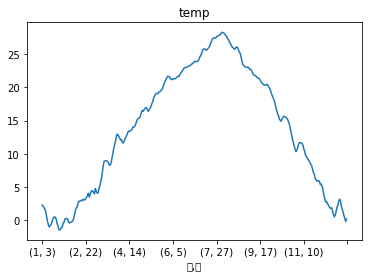

In [25]:
grahp_temp['평균 기온'] = grahp_temp['평균 기온'].rolling(7, min_periods=1, center = True).mean()
grahp_temp['평균 기온'].plot(title = 'temp')

<AxesSubplot:title={'center':'people'}, xlabel='월,일'>

D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda3\envs\data\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)


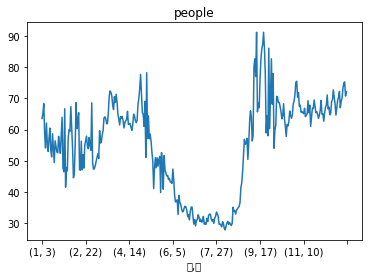

In [26]:
# grahp_temp['인원수'] = grahp_temp['인원수'].rolling(7, min_periods=1, center = True).mean()
grahp_temp['인원수'].plot(title = 'people')